In [7]:
print("Map of Race: Non Latinx Black and Latinx People in Los Angeles County")

Map of Race: Non Latinx Black and Latinx People in Los Angeles County


In [8]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [9]:
gdf = gpd.read_file('Data/Census_Data/acs2019_5yr_B03002_14000US06037534001.geojson')

In [10]:
gdf.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,0.0,5193136.0,0.0,2641770.0,1343.0,790252.0,2958.0,...,567.0,2083135.0,21995.0,174263.0,4915.0,103325.0,3658.0,70938.0,2605.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,443.0,3095.0,354.0,2616.0,306.0,19.0,15.0,...,12.0,383.0,311.0,74.0,52.0,34.0,28.0,40.0,46.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,334.0,3258.0,344.0,2882.0,358.0,74.0,102.0,...,12.0,48.0,55.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,484.0,3731.0,465.0,2986.0,435.0,198.0,165.0,...,17.0,874.0,477.0,81.0,80.0,48.0,62.0,33.0,51.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,276.0,2338.0,236.0,1812.0,271.0,87.0,107.0,...,12.0,497.0,231.0,45.0,42.0,11.0,18.0,34.0,39.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [11]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [12]:
columns_to_keep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [13]:
gdf = gdf[columns_to_keep]

In [14]:
gdf.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,5193136.0,2641770.0,790252.0,20831.0,1454769.0,24597.0,32413.0,228504.0,4888434.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [15]:
list(gdf)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [16]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [17]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
0,05000US06037,"Los Angeles County, CA",10081570.0,5193136.0,2641770.0,790252.0,20831.0,1454769.0,24597.0,32413.0,228504.0,4888434.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [18]:
gdf = gdf.drop([0])

In [19]:
gdf.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


In [20]:
gdf['Total'].describe()

count     2346.000000
mean      4297.344416
std       1587.065962
min          0.000000
25%       3203.750000
50%       4211.500000
75%       5314.000000
max      12463.000000
Name: Total, dtype: float64

In [35]:
print("Looking at histogram displaying distribution of Latinx and Non Latinx Black census tracts")

Looking at histogram displaying distribution of Latinx and Non Latinx Black census tracts


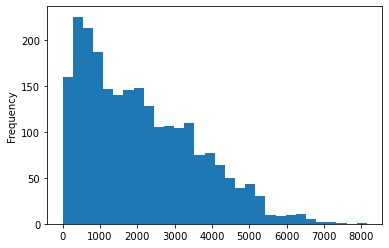

In [21]:
gdf['Hispanic'].plot.hist(bins=30)

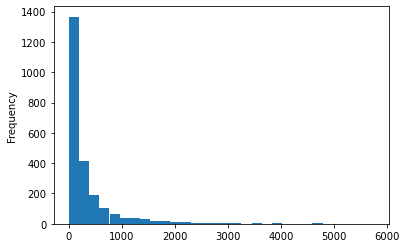

In [34]:
gdf['Non Hispanic Black'].plot.hist(bins=30)

In [22]:
gdf_no_pop = gdf[gdf['Total']==0]

In [23]:
gdf_no_pop[['geoid','Total']]

,geoid,Total
1055,14000US06037320000,0.0
2318,14000US06037980001,0.0
2319,14000US06037980002,0.0
2320,14000US06037980003,0.0
2321,14000US06037980004,0.0
2322,14000US06037980005,0.0
2323,14000US06037980006,0.0
2324,14000US06037980007,0.0
2328,14000US06037980013,0.0
2331,14000US06037980018,0.0


In [24]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Non Hispanic',
 'Non Hispanic White',
 'Non Hispanic Black',
 'Non Hispanic American Indian and Alaska Native',
 'Non Hispanic Asian',
 'Non Hispanic Native Hawaiian and Other Pacific Islander',
 'Non Hispanic Some other race',
 'Non Hispanic Two or more races',
 'Hispanic',
 'geometry']

In [36]:
print("Creating new % categories")

Creating new % categories


In [25]:
gdf['Percent Non Hispanic Black'] = gdf['Non Hispanic Black']/gdf['Total']*100
gdf['Percent Hispanic'] = gdf['Hispanic']/gdf['Total']*100

In [26]:
gdf.sample(15)

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic Black,Percent Hispanic
972,14000US06037296401,"Census Tract 2964.01, Los Angeles, CA",3229.0,2446.0,1761.0,168.0,0.0,368.0,0.0,26.0,123.0,783.0,"MULTIPOLYGON (((-118.32003 33.74149, -118.3200...",5.202849,24.248993
1587,14000US06037533203,"Census Tract 5332.03, Los Angeles, CA",1931.0,36.0,5.0,1.0,0.0,9.0,0.0,0.0,21.0,1895.0,"MULTIPOLYGON (((-118.21349 33.97655, -118.2124...",0.051787,98.135681
165,14000US06037122121,"Census Tract 1221.21, Los Angeles, CA",2829.0,566.0,253.0,122.0,7.0,162.0,0.0,0.0,22.0,2263.0,"MULTIPOLYGON (((-118.37905 34.21570, -118.3747...",4.312478,79.992930
1763,14000US06037553000,"Census Tract 5530, Los Angeles, CA",5033.0,1111.0,604.0,83.0,0.0,318.0,33.0,4.0,69.0,3922.0,"MULTIPOLYGON (((-118.10824 33.89550, -118.1081...",1.649116,77.925690
621,14000US06037213401,"Census Tract 2134.01, Los Angeles, CA",4859.0,1425.0,268.0,132.0,0.0,1016.0,0.0,0.0,9.0,3434.0,"MULTIPOLYGON (((-118.29162 34.05498, -118.2903...",2.716608,70.672978
1704,14000US06037543306,"Census Tract 5433.06, Los Angeles, CA",7863.0,5595.0,596.0,1126.0,0.0,2987.0,512.0,43.0,331.0,2268.0,"MULTIPOLYGON (((-118.26487 33.84746, -118.2646...",14.320234,28.843953
206,14000US06037125100,"Census Tract 1251, Los Angeles, CA",5892.0,4703.0,3637.0,513.0,20.0,424.0,2.0,14.0,93.0,1189.0,"MULTIPOLYGON (((-118.39650 34.17214, -118.3954...",8.706721,20.179905
1671,14000US06037541100,"Census Tract 5411, Los Angeles, CA",3251.0,1456.0,63.0,1251.0,0.0,60.0,0.0,0.0,82.0,1795.0,"MULTIPOLYGON (((-118.26896 33.90196, -118.2684...",38.480468,55.213780
596,14000US06037211922,"Census Tract 2119.22, Los Angeles, CA",3269.0,1927.0,188.0,231.0,41.0,1450.0,9.0,0.0,8.0,1342.0,"MULTIPOLYGON (((-118.29665 34.06903, -118.2954...",7.066381,41.052310
2220,14000US06037910210,"Census Tract 9102.10, Los Angeles, CA",7239.0,4814.0,3163.0,920.0,0.0,643.0,0.0,0.0,88.0,2425.0,"MULTIPOLYGON (((-118.21032 34.61809, -118.2098...",12.708938,33.499102


In [37]:
print("Experimenting with individual maps of Non Latinx Black and Latinx census tracts")

Experimenting with individual maps of Non Latinx Black and Latinx census tracts


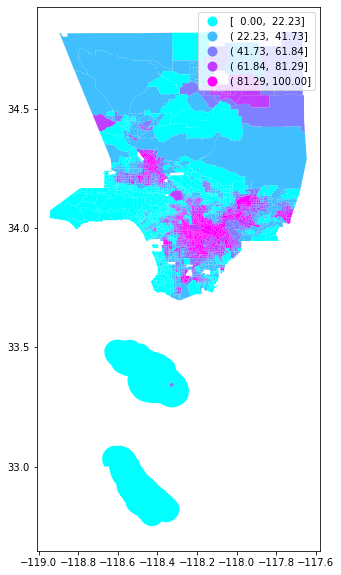

In [27]:
gdf.plot(figsize=(12,10),
                 column='Percent Hispanic',
                 legend=True, 
                 cmap='cool',
                 scheme='NaturalBreaks')

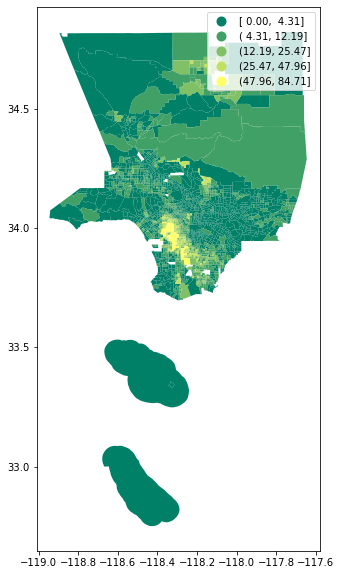

In [28]:
gdf.plot(figsize=(12,10),
                 column='Percent Non Hispanic Black',
                 legend=True, 
                 cmap='summer',
                 scheme='NaturalBreaks')

In [38]:
print("Side by side maps")

Side by side maps


Text(0.5, 1.0, 'Percent Non Latinx Black People')

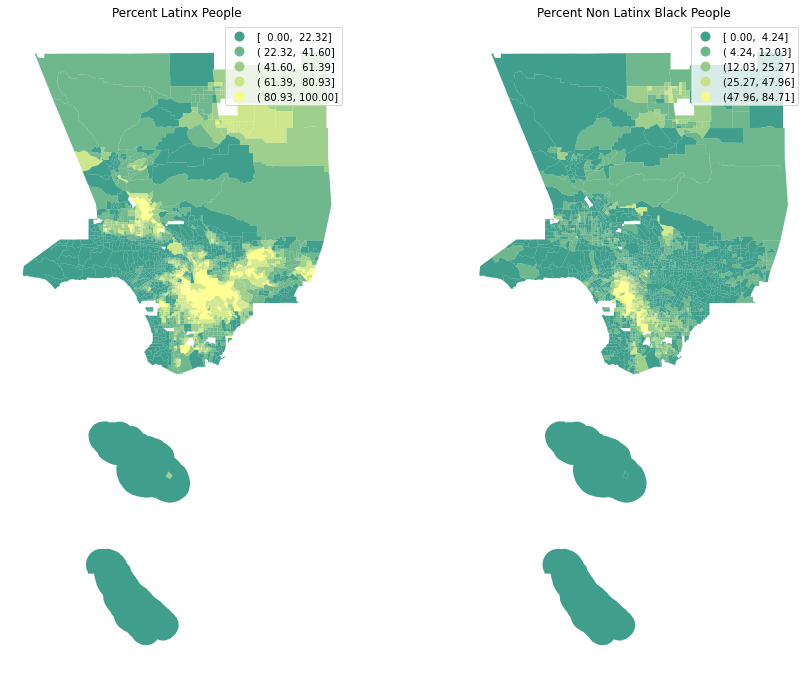

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))
ax1, ax2 = axs
gdf.plot(column='Percent Hispanic', 
            cmap='summer', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )
ax1.axis("off")
ax1.set_title("Percent Latinx People")

gdf.plot(column='Percent Non Hispanic Black', 
            cmap='summer', 
            scheme='NaturalBreaks',
            k=5, 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )
ax2.axis("off")
ax2.set_title("Percent Non Latinx Black People")

In [30]:
gdf_web_mercator = gdf.to_crs(epsg=3857)

In [31]:
gdf_web_mercator.head()

,geoid,name,Total,Non Hispanic,Non Hispanic White,Non Hispanic Black,Non Hispanic American Indian and Alaska Native,Non Hispanic Asian,Non Hispanic Native Hawaiian and Other Pacific Islander,Non Hispanic Some other race,Non Hispanic Two or more races,Hispanic,geometry,Percent Non Hispanic Black,Percent Hispanic
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",4283.0,3095.0,2616.0,19.0,3.0,331.0,3.0,8.0,115.0,1188.0,"MULTIPOLYGON (((-13169350.794 4063591.834, -13...",0.443614,27.737567
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",3405.0,3258.0,2882.0,74.0,15.0,220.0,0.0,0.0,67.0,147.0,"MULTIPOLYGON (((-13169467.902 4065613.937, -13...",2.173275,4.317181
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",6347.0,3731.0,2986.0,198.0,0.0,486.0,0.0,47.0,14.0,2616.0,"MULTIPOLYGON (((-13169034.646 4063225.625, -13...",3.119584,41.216323
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",3702.0,2338.0,1812.0,87.0,0.0,341.0,0.0,0.0,98.0,1364.0,"MULTIPOLYGON (((-13167528.939 4062726.771, -13...",2.350081,36.844949
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",3884.0,3587.0,3126.0,205.0,0.0,194.0,0.0,0.0,62.0,297.0,"MULTIPOLYGON (((-13166671.668 4062511.964, -13...",5.278064,7.646756


In [39]:
print("Looking at census tracts with more than 50% Non Latinx Black and Latinx people. This data will be used to see whether BRT lines adequately serve this census blocks.")

Looking at census tracts with more than 50% Non Latinx Black and Latinx people. This data will be used to see whether BRT lines adequately serve this census blocks.


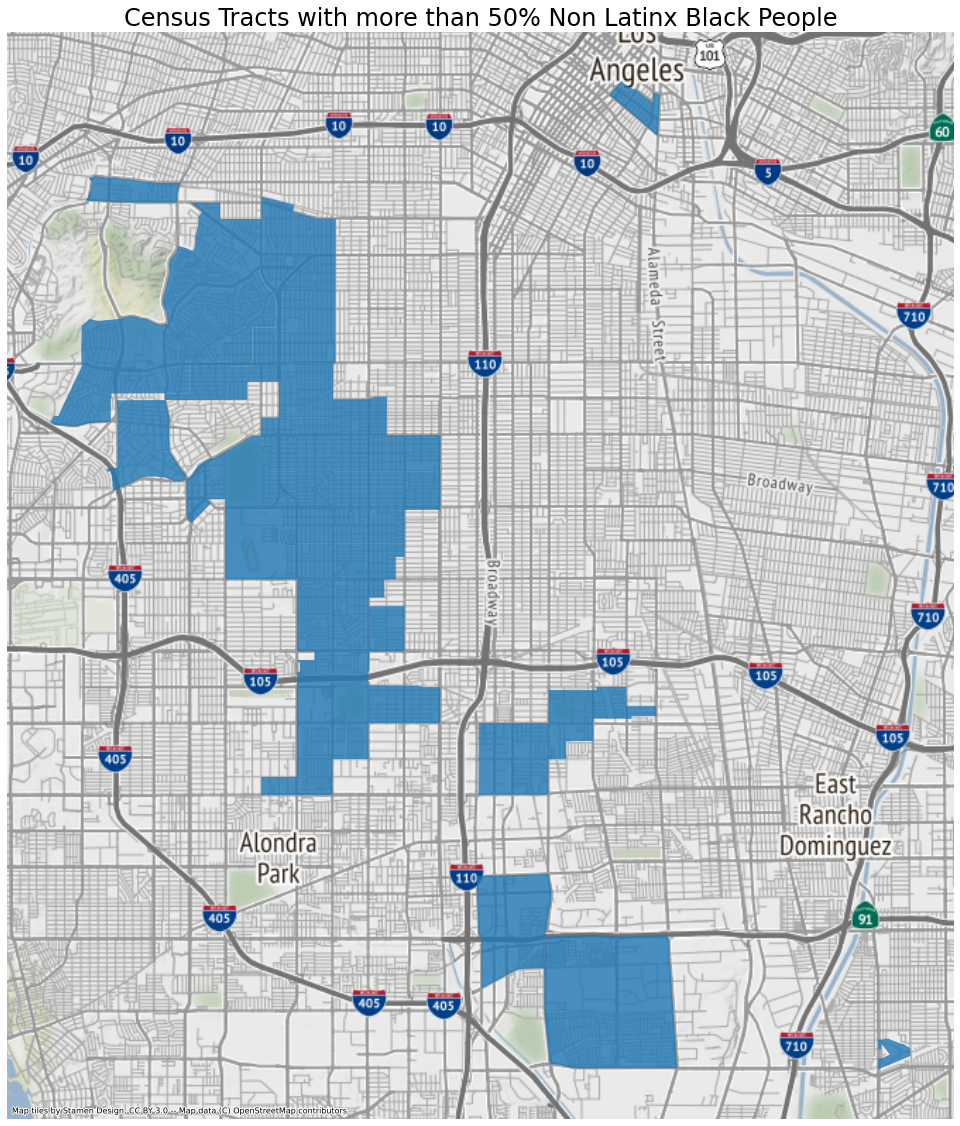

In [32]:
fig, ax = plt.subplots(figsize=(20, 20))
gdf_web_mercator[gdf_web_mercator['Percent Non Hispanic Black'] > 50].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts with more than 50% Non Latinx Black People',fontsize=24)
ctx.add_basemap(ax)

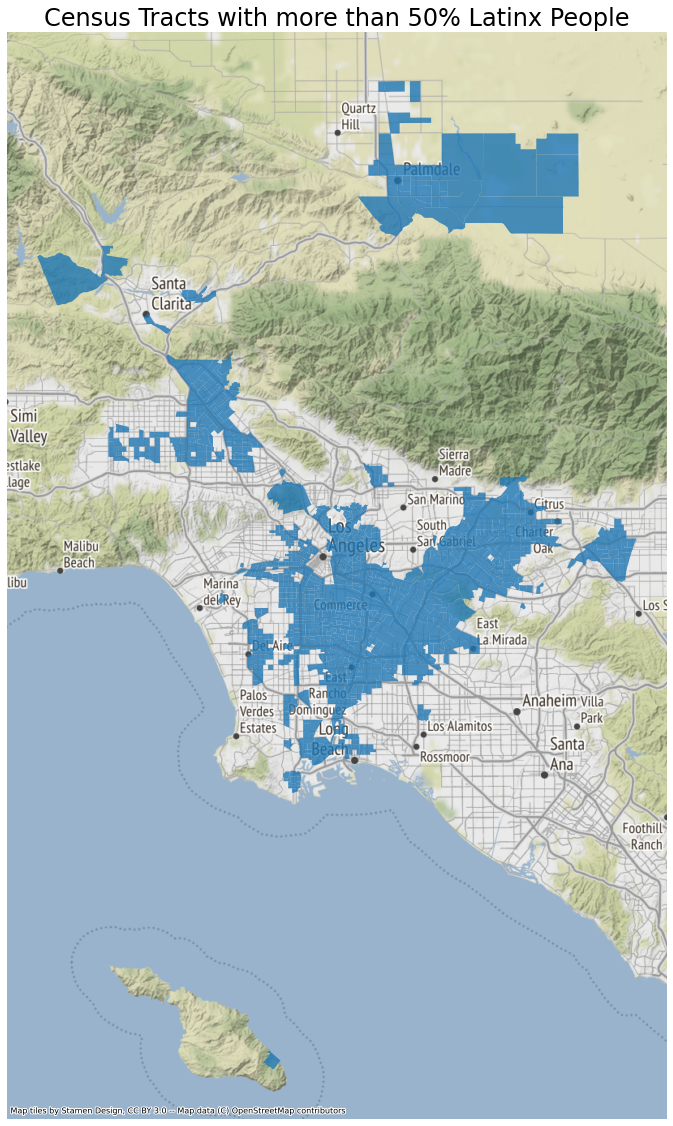

In [33]:
fig, ax = plt.subplots(figsize=(20, 20))
gdf_web_mercator[gdf_web_mercator['Percent Hispanic'] > 50].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts with more than 50% Latinx People',fontsize=24)
ctx.add_basemap(ax)